# Analysis of Ekman Dynamics

In this notebook, we will delve into the analysis of Ekman dynamics using wind data for 2023. This process involves computing Ekman transport, wind stress curl, and vertical Ekman velocity. These are fundamental components for understanding wind-driven ocean circulation.

We will begin by importing the necessary Python libraries for data analysis and visualization. Additionally, we will load the `ekman_dynamics` module that we developed in the previous session. This module contains custom functions for calculating the Ekman properties, which we will reuse throughout this notebook.

First, we import the necessary libaries:

In [68]:
# run the cell
# Standard libraries
import os
#import requests

# Scientific libraries
import numpy as np
import xarray as xr


#Visualization libraries

from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt



### Loading Wind Data and Testing Ekman Functions

Now, let's load our wind data for 2023 (12 months) and test if our functions work correctly. Additionally, we want to compare the results when we calculate the Ekman properties in two different ways:

    Annual Mean Approach: First, we calculate the annual mean of the wind data and then compute the Ekman properties.

    Monthly Data Approach: We calculate the Ekman properties for each month individually and then average the results.

Finally, we will analyze whether there is any significant difference between the two approaches. What do you expect the differences to be?



### Conditional Loading of Wind Data

Before we proceed, it's important to ensure that the necessary wind data files are available. In this step, we introduce an if-else statement, which is a fundamental decision-making structure in programming.

The if-else logic allows us to check for conditions and execute code accordingly. In our case, we use it to verify if the wind data files exist before attempting to load them.

    If the files are found, the dataset will be loaded.
    Else if any files are missing, the program will notify us which files are missing, and the dataset will not be loaded.

This logic ensures that we avoid errors related to missing data and proceed only when the necessary files are available.


**Note**: You probably already downloaded the data as it was one of the tasks in Session 1. If you want to test whether the conditional loading works, you can simply change the year range. This way, files that are definitely not in the folder will be included in your dictionary. This helps verify that the file existence check is functioning as expected


In [70]:
# run the cell to get the wind data
## datapath and filename
datapath = '../Data/Wind'

# Load data - first part like in session 2
# Define file paths for the year 2023
data_ranges = {year: list(range(1, 13)) for year in range(2023, 2024)}

filenames = [os.path.join(datapath, f'cmems_obs-wind_glo_phy_my_l4_P1M_{year}{str(month).zfill(2)}.nc') 
              for year, months in data_ranges.items() for month in months]

# New: Check if all files exist before loading
missing_files = [file for file in filenames if not os.path.exists(file)]

# Conditional logic to load data only if files are available
if not missing_files:
    # Load the files using open_mfdataset
    print("All files found. Loading the dataset...")
    ds_wind = xr.open_mfdataset(filenames, combine='by_coords')
else:
    # Print an error message and list the missing files
    print("The following files are missing, so the dataset will not be loaded:")
    for missing in missing_files:
        print(missing)

# using conditional logic prevents errors by ensuring a specific condition is met

All files found. Loading the dataset...


In [71]:
# run the cell
ds_wind.coords

Coordinates:
  * time     (time) datetime64[ns] 96B 2023-01-16T12:00:00 ... 2023-12-16T12:...
  * lat      (lat) float32 3kB -89.88 -89.62 -89.38 -89.12 ... 89.38 89.62 89.88
  * lon      (lon) float32 6kB -179.9 -179.6 -179.4 -179.1 ... 179.4 179.6 179.9

In [72]:
ds_wind

<xarray.Dataset> Size: 1GB
Dimensions:                 (time: 12, lat: 720, lon: 1440)
Coordinates:
  * time                    (time) datetime64[ns] 96B 2023-01-16T12:00:00 ......
  * lat                     (lat) float32 3kB -89.88 -89.62 ... 89.62 89.88
  * lon                     (lon) float32 6kB -179.9 -179.6 ... 179.6 179.9
Data variables: (12/13)
    eastward_wind           (time, lat, lon) float64 100MB dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    eastward_wind_bias      (time, lat, lon) float64 100MB dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    eastward_wind_sdd       (time, lat, lon) float64 100MB dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    northward_wind          (time, lat, lon) float64 100MB dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    northward_wind_bias     (time, lat, lon) float64 100MB dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    northward_wind_sdd      (time, lat, lon) float64 100MB dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    ...                      ...
    eastward_stress_bias    (time, lat, lon) float64 100MB dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    eastward_stress_sdd     (time, lat, lon) float64 100MB dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    northward_stress        (time, lat, lon) float64 100MB dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    northward_stress_bias   (time, lat, lon) float64 100MB dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    northward_stress_sdd    (time, lat, lon) float64 100MB dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    number_of_observations  (time, lat, lon) float32 50MB dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
Attributes: (12/25)
    title:                       Global Ocean - Wind and Stress - Monthly - F...
    summary:                    Global ocean monthly mean 10-m stress-equival...
    keywords:                   ocean winds, wind stress
    Conventions:                CF-1.6, ACDD-1.3
    project:                    Copernicus Marine Service Wind Thematic Assem...
    institution:                Royal Netherlands Meteorological Institute (K...
    ...                         ...
    time_coverage_start:        2023-01-01T00:00:00
    time_coverage_end:          2023-01-31T23:59:59
    references:                 Copernicus Marine Service Product User Manual...
    history:                    N/A
    date_created:               2023-05-10T11:45:15
    date_modified:              2023-05-10T11:45:15

**1. Exercise: Calculate Ekman Dynamics from Annual Mean Wind Data**

In this exercise, you will calculate the Ekman dynamics based on the annual mean wind dataset. This will help you understand how averaging over time affects the variability in Ekman transport, Ekman pumping, and wind stress curl.

Steps 1:

**Load the module**:
First, you need to ensure that the path to the ekman_dynamics module is correctly set. Use the following code snippet to append the correct path and import the function `compute_ekman_properties`.



To ensure proper access to the module, we will add the path to the folder where the `ekman_dynamics.py` script is stored using the `sys.path.append()` command. This allows us to import and use our custom functions seamlessly within this notebook.

In [73]:
# run the cell

import sys
# we add the folder to Python's search path, allowing us to import custom modules from that directory
sys.path.append('../Modules')


from ekman_dynamics import compute_ekman_properties

In [45]:
# run the cell
help(compute_ekman_properties)

Help on function compute_ekman_properties in module ekman_dynamics:

compute_ekman_properties(u, v, rho_air=1.293, Cd=0.0013, rho_water=1025)
    Compute Ekman transport and Ekman pumping from wind velocity components.

    Parameters:
    - u, v: Wind velocity components in m/s (3D xarray.DataArray: time, lat, lon).
    - Cd: Drag coefficient. Default is 1.3e-3.
    - rho_water: Water density in kg/m^3. Default is 1025 kg/m^3.

    Returns:
    - curl_tau: Wind stress curl in N/m^3 (3D xarray.DataArray: time, lat, lon).
    - M_u, M_v: Ekman transport components in m^2/s (3D xarray.DataArray: time, lat, lon).
    - mean_Ekman: Absolute Ekman transport in m^2/s (3D xarray.DataArray: time, lat, lon).
    - w_E: Ekman pumping velocity in m/s (3D xarray.DataArray: time, lat, lon).



Step 2:

**Compute the Annual Mean**: Now, calculate the annual mean for all variables in your wind dataset. This will average each variable over the entire time period, resulting in a dataset that represents the mean values across all time steps for each spatial point.

In [46]:
# your code here
#ds_wind_mean=
ds_wind_mean = ds_wind.mean(dim='time')


In [74]:
# run the cell
# Verify if the data looks as expected
ds_wind_mean

<xarray.Dataset> Size: 104MB
Dimensions:                 (lat: 720, lon: 1440)
Coordinates:
  * lat                     (lat) float32 3kB -89.88 -89.62 ... 89.62 89.88
  * lon                     (lon) float32 6kB -179.9 -179.6 ... 179.6 179.9
Data variables: (12/13)
    eastward_wind           (lat, lon) float64 8MB dask.array<chunksize=(720, 1440), meta=np.ndarray>
    eastward_wind_bias      (lat, lon) float64 8MB dask.array<chunksize=(720, 1440), meta=np.ndarray>
    eastward_wind_sdd       (lat, lon) float64 8MB dask.array<chunksize=(720, 1440), meta=np.ndarray>
    northward_wind          (lat, lon) float64 8MB dask.array<chunksize=(720, 1440), meta=np.ndarray>
    northward_wind_bias     (lat, lon) float64 8MB dask.array<chunksize=(720, 1440), meta=np.ndarray>
    northward_wind_sdd      (lat, lon) float64 8MB dask.array<chunksize=(720, 1440), meta=np.ndarray>
    ...                      ...
    eastward_stress_bias    (lat, lon) float64 8MB dask.array<chunksize=(720, 1440), meta=np.ndarray>
    eastward_stress_sdd     (lat, lon) float64 8MB dask.array<chunksize=(720, 1440), meta=np.ndarray>
    northward_stress        (lat, lon) float64 8MB dask.array<chunksize=(720, 1440), meta=np.ndarray>
    northward_stress_bias   (lat, lon) float64 8MB dask.array<chunksize=(720, 1440), meta=np.ndarray>
    northward_stress_sdd    (lat, lon) float64 8MB dask.array<chunksize=(720, 1440), meta=np.ndarray>
    number_of_observations  (lat, lon) float32 4MB dask.array<chunksize=(720, 1440), meta=np.ndarray>

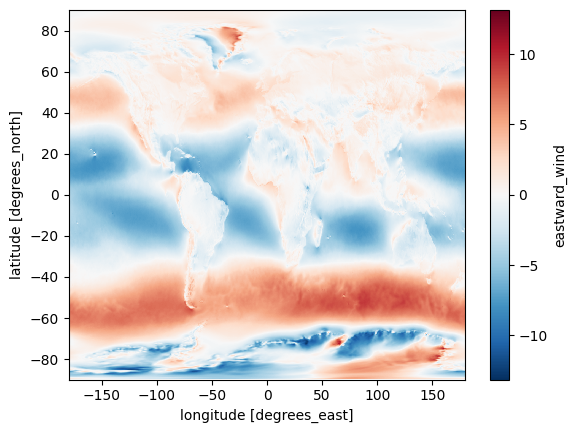

In [48]:
# plot the eastward_wind (keep it simple -> use .plot())

ds_wind_mean['eastward_wind'].plot()

In [75]:
help(compute_ekman_properties)

Help on function compute_ekman_properties in module ekman_dynamics:

compute_ekman_properties(u, v, rho_air=1.293, Cd=0.0013, rho_water=1025)
    Compute Ekman transport and Ekman pumping from wind velocity components.

    Parameters:
    - u, v: Wind velocity components in m/s (3D xarray.DataArray: time, lat, lon).
    - Cd: Drag coefficient. Default is 1.3e-3.
    - rho_water: Water density in kg/m^3. Default is 1025 kg/m^3.

    Returns:
    - curl_tau: Wind stress curl in N/m^3 (3D xarray.DataArray: time, lat, lon).
    - M_u, M_v: Ekman transport components in m^2/s (3D xarray.DataArray: time, lat, lon).
    - mean_Ekman: Absolute Ekman transport in m^2/s (3D xarray.DataArray: time, lat, lon).
    - w_E: Ekman pumping velocity in m/s (3D xarray.DataArray: time, lat, lon).



In [77]:
curl_tau, M_u, M_v, mean_Ekman, w_E = compute_ekman_properties(ds_wind_mean.eastward_wind, ds_wind_mean.northward_wind)

Step 3

**Calculate Ekman Properties**
Using the annual mean wind data (`ds_wind_mean`), calculate the Ekman properties. Pass the eastward_wind and northward_wind values to the `compute_ekman_properties` function.

In [49]:
# your code here
#curl_tau, M_u, M_v, mean_Ekman, w_E = 
curl_tau, M_u, M_v, mean_Ekman, w_E = compute_ekman_properties(ds_wind_mean.eastward_wind, ds_wind_mean.northward_wind)

We quickly plot the vertical Ekman velocity for a visual check using plot and adding a mask, so that only ocean regions are shown

In [80]:
w_E

<xarray.DataArray (lat: 720, lon: 1440)> Size: 8MB
dask.array<truediv, shape=(720, 1440), dtype=float64, chunksize=(720, 1440), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float32 3kB -89.88 -89.62 -89.38 -89.12 ... 89.38 89.62 89.88
  * lon      (lon) float32 6kB -179.9 -179.6 -179.4 -179.1 ... 179.4 179.6 179.9

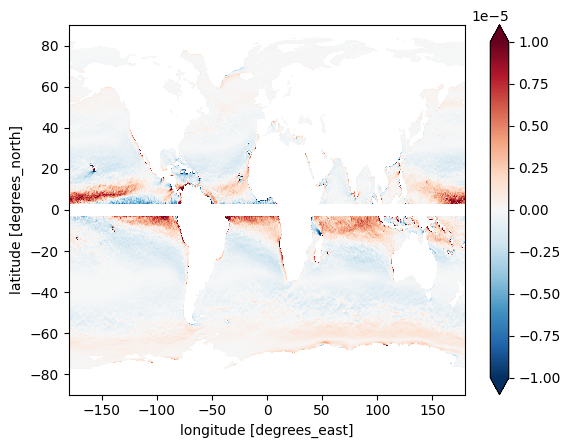

In [81]:
# run the cell
mask = ds_wind_mean.number_of_observations.notnull()

w_E.where(mask).plot(cmap='RdBu_r',vmin=-.00001, vmax=.00001)

Step 4

Now calculate the Ekman components based on the monthly fields.
Our functions are designed to handle this calculation within the function itself.



In [52]:
# your code here
#curl_tau_monthly, M_u_monthly, M_v_monthly, mean_Ekman_monthly, w_E_monthly = 
curl_tau_monthly, M_u_monthly, M_v_monthly, mean_Ekman_monthly, w_E_monthly = compute_ekman_properties(ds_wind.eastward_wind, 
                                                                                                       ds_wind.northward_wind)

In [53]:
# run the cell
# checking the shape of w_E
w_E_monthly.shape

(12, 720, 1440)

We quickly average and plot the vertical Ekman velocity for a visual check using plot and adding a mask, so that only ocean regions are shown

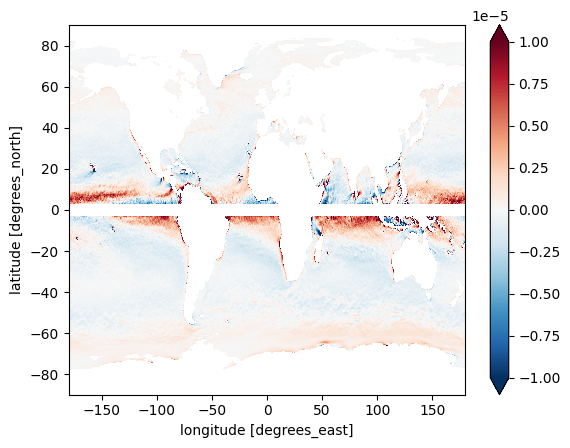

In [54]:
# run the cell

w_E_monthly.mean(dim='time').where(mask).plot(cmap='RdBu_r',vmin=-.00001, vmax=.00001)

**2. Exercise**    
Compare the patterns and magnitudes of `w_E` computed based on the annual mean of wind data with those computed from the monthly calculations of `w_E`. To do this, compute the difference between the two.  What do these differences tell us?  Observe the regions with significant discrepancies and discuss what these differences might imply about seasonal wind variations and their impact on Ekman transport.
.

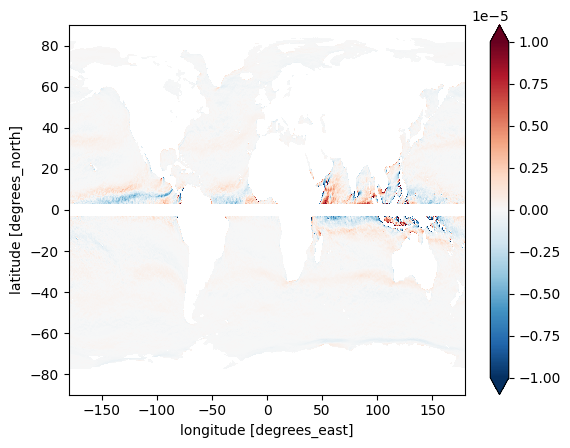

In [55]:
# your code here

(w_E-w_E_monthly.mean(dim='time')).where(mask).plot(cmap='RdBu_r',vmin=-.00001, vmax=.00001)


### Your Observations here


Differences in `w_E` between calculations based on annual mean wind data and those from monthly data can indeed be both positive and negative. Values far from zero indicate that monthly data exhibit more variability, while values close to zero suggest that using annual or monthly calculations doesn’t significantly affect the results. Lower temporal resolution tends to smooth out variability, and since we only have one year of data (12 months), this smoothing effect mainly impacts intra-annual and seasonal variability. 

**Summary:** Both the annual mean and monthly average methods produce an annual field of `w_E`, and each has its merits. However, averaging data inherently reduces variability. While averaging helps to identify larger trends, it’s important not to overlook the smaller-scale variations that can play a significant role in understanding the system's dynamics.




**3. Exercise**

Also plot the differences for the other Ekman properties.

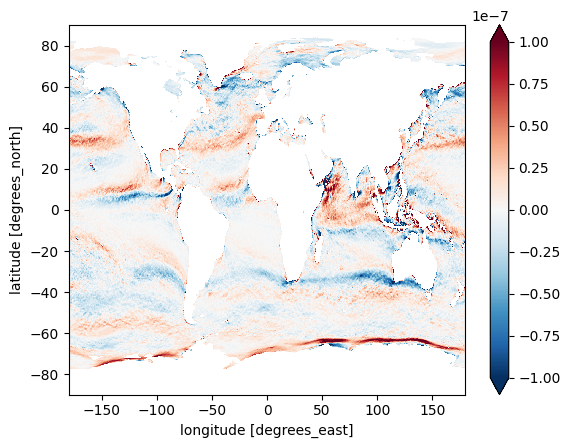

In [56]:
# your code here

(curl_tau-curl_tau_monthly.mean(dim='time').where(mask)).plot(cmap='RdBu_r',vmin=-.0000001, vmax=.0000001)

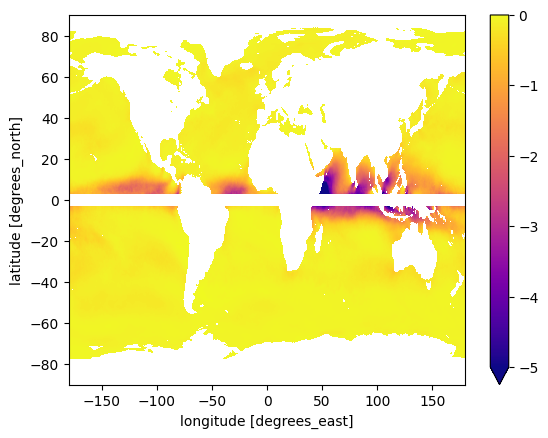

In [57]:
# your code here

(mean_Ekman-mean_Ekman_monthly.mean(dim='time').where(mask)).plot(cmap='plasma',vmin = -5, vmax= 0)

**Extra Excercise**

So far in Session 4, we’ve been using the basic `.plot()` function for visualizations. However, in previous sessions, we created more refined figures with gridlines, axis labels, and other enhancements.

Now, let's take it a step further by producing a more refined plot of the vertical Ekman Velocity, along with the other variables we've calculated.

Additionally, consider creating a reusable plot function to avoid duplicating the plotting code each time.


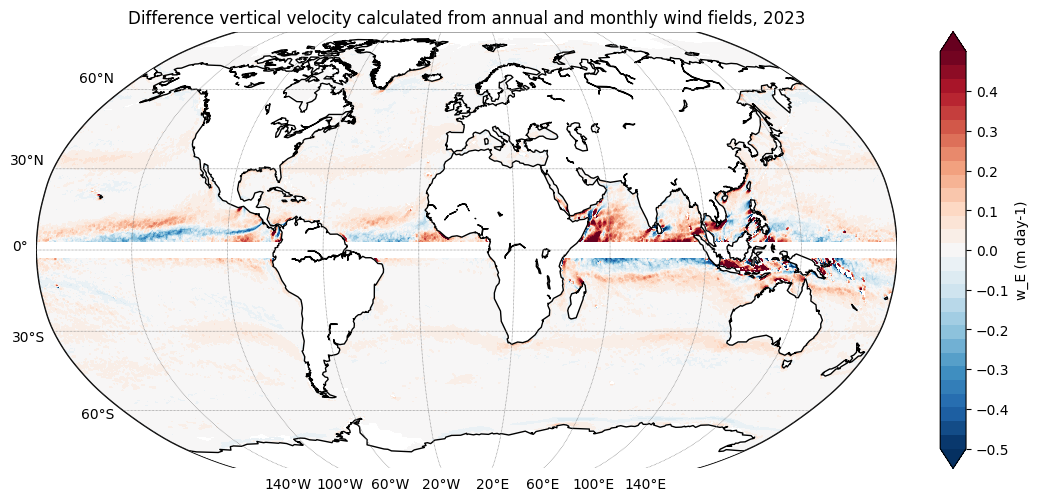

In [58]:
# your function and plot

# Create the figure and axis
fig, ax = plt.subplots(figsize=(12, 7))

# Define the map projection using Robinson (Basemap for Robinson projection)
m = Basemap(projection='robin', lon_0=0, ax=ax)

# Get longitude and latitude data from the dataset


# Create a meshgrid for plotting
lon2d, lat2d = np.meshgrid(w_E.lon, w_E.lat)

# Transform the coordinates into the Robinson projection
x, y = m(lon2d, lat2d)

# Define levels for contouring (for eastward wind)
levels = np.linspace(-.5, .5, 30)

# Plot the eastward wind data using contourf
cs = m.contourf(x, y, 86400*(w_E-w_E_monthly.mean(dim='time')).where(mask),cmap='RdBu_r',levels=levels, extend='both')

# Add a colorbar
cbar = m.colorbar(cs, location='right', pad="5%",size="3%",ticks=np.arange(-.5, .5, .1))

cbar.set_label(f'w_E (m day-1)')


# Use Basemap to fill continents with white
m.fillcontinents(color='white')

# Draw coastlines (only coastlines, no rivers)
m.drawcoastlines()

# Add gridlines (parallels and meridians) for the Robinson projection
m.drawparallels(np.arange(-90., 91., 30.), labels=[1, 0, 0, 0], linewidth=0.5, color='gray')
m.drawmeridians(np.arange(-180., 181., 40.), labels=[0, 0, 0, 1], linewidth=0.5, color='gray')


# Set a dynamic title based on the dataset
plt.title(f"Difference vertical velocity calculated from annual and monthly wind fields, 2023")

# Show the plot
plt.show()

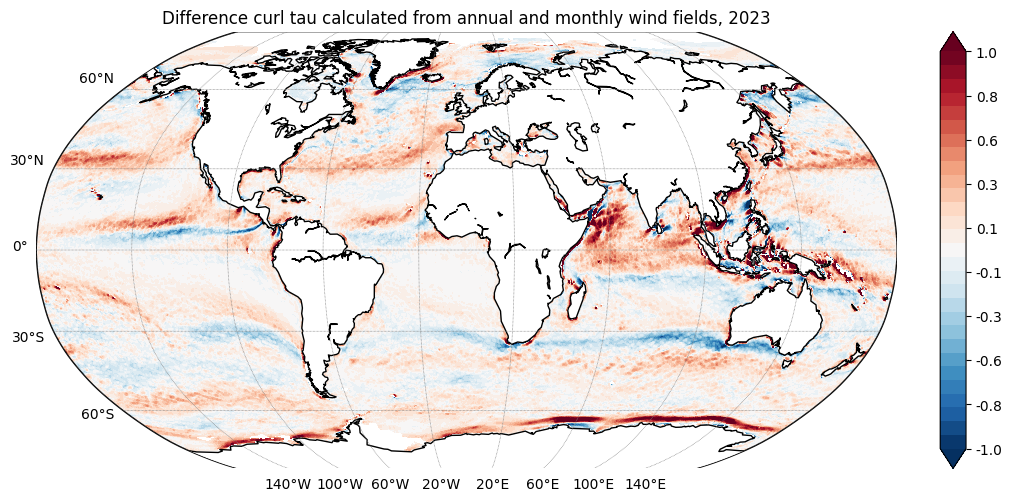

In [59]:
# plot function


def plot_variable(data, lon, lat, mask=None, title="",cb_title="", vmin=None, vmax=None):
    """
    Plots the given data (e.g., curl_tau or differences) using the Basemap Robinson projection.
    
    Parameters:
    - data: The data array to plot (xarray or numpy array).
    - lon: Longitude values (1D array).
    - lat: Latitude values (1D array).
    - mask: A mask to apply to the data for valid plotting areas (e.g., ocean).
    - title: Title of the plot.
    - vmin: Minimum value for the color scale (optional).
    - vmax: Maximum value for the color scale (optional).
    """
    
    # Create the figure and axis
    fig, ax = plt.subplots(figsize=(12, 7))
    
    # Define the map projection using Robinson
    m = Basemap(projection='robin', lon_0=0, ax=ax)
    
    # Create a meshgrid for plotting
    lon2d, lat2d = np.meshgrid(lon, lat)
    
    # Transform the coordinates into the Robinson projection
    x, y = m(lon2d, lat2d)
    
    # Determine color map based on the range of the data
    if (data.min() < 0) and (data.max() > 0):  # Positive and negative values
        cmap = 'RdBu_r'
    else:  # Only positive or negative values
        cmap = 'viridis'
    
    # Define the levels for contouring based on vmin and vmax or default values
    if vmin is None:
        vmin = data.min()
    if vmax is None:
        vmax = data.max()
    
    levels = np.linspace(vmin, vmax, 30)

    # Apply mask if provided, otherwise plot the data directly
    if mask is not None:
        data_to_plot = data.where(mask)
    else:
        data_to_plot = data
    
    # Plot the data using contourf
    cs = m.contourf(x, y, data_to_plot, cmap=cmap, levels=levels, extend='both')
    
    # Add a colorbar
    cbar = m.colorbar(cs, location='right', pad="5%", size="3%", format="%.1f", ticks=np.linspace(vmin, vmax, 10))
    cbar.set_label(cb_title)
    
    # Use Basemap to fill continents with white
    m.fillcontinents(color='white')
    
    # Draw coastlines
    m.drawcoastlines()
    
    # Add gridlines (parallels and meridians)
    m.drawparallels(np.arange(-90., 91., 30.), labels=[1, 0, 0, 0], linewidth=0.5, color='gray')
    m.drawmeridians(np.arange(-180., 181., 40.), labels=[0, 0, 0, 1], linewidth=0.5, color='gray')
    
    # Set the plot title
    plt.title(title)
    
    # Show the plot
    plt.show()

# how to use
plot_variable(10**7 * (curl_tau - curl_tau_monthly.mean(dim='time')), curl_tau.lon, curl_tau.lat, mask,
              title="Difference curl tau calculated from annual and monthly wind fields, 2023", vmin=-1, vmax=1)


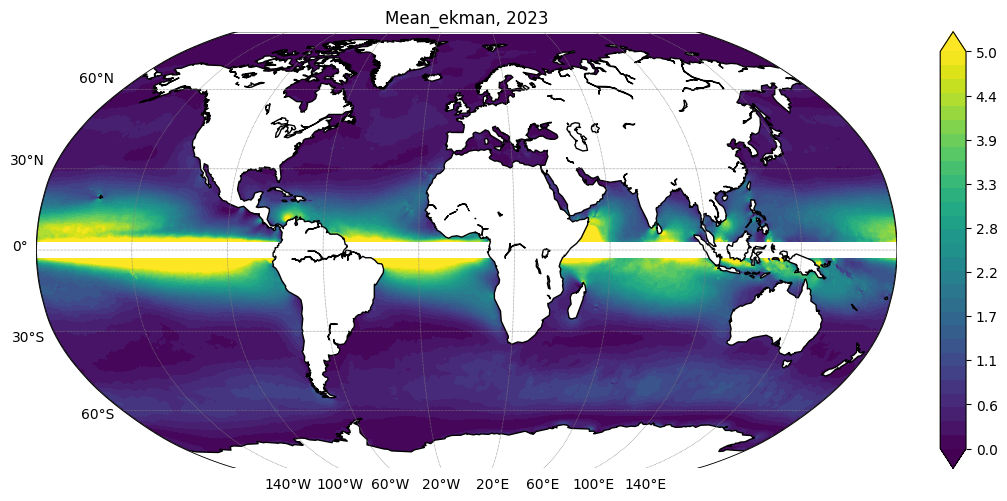

In [60]:

plot_variable((mean_Ekman_monthly.mean(dim='time')), mean_Ekman_monthly.lon, mean_Ekman_monthly.lat,vmin=0,vmax = 5,
              title="Mean_ekman, 2023")

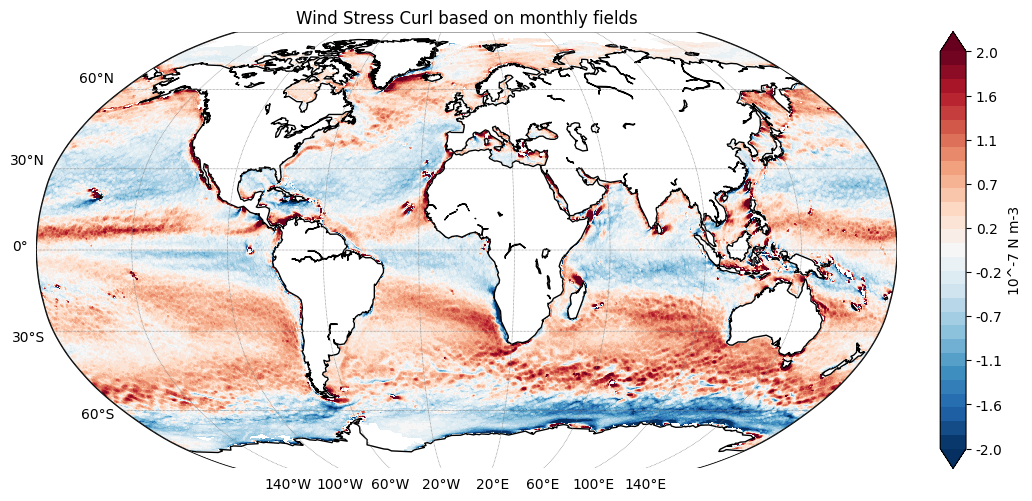

In [61]:
plot_variable(1e7 * (curl_tau_monthly.mean(dim='time')), curl_tau_monthly.lon, curl_tau_monthly.lat, mask,
              title="Wind Stress Curl based on monthly fields",cb_title = "10^-7 N m-3", vmin=-2, vmax=2)

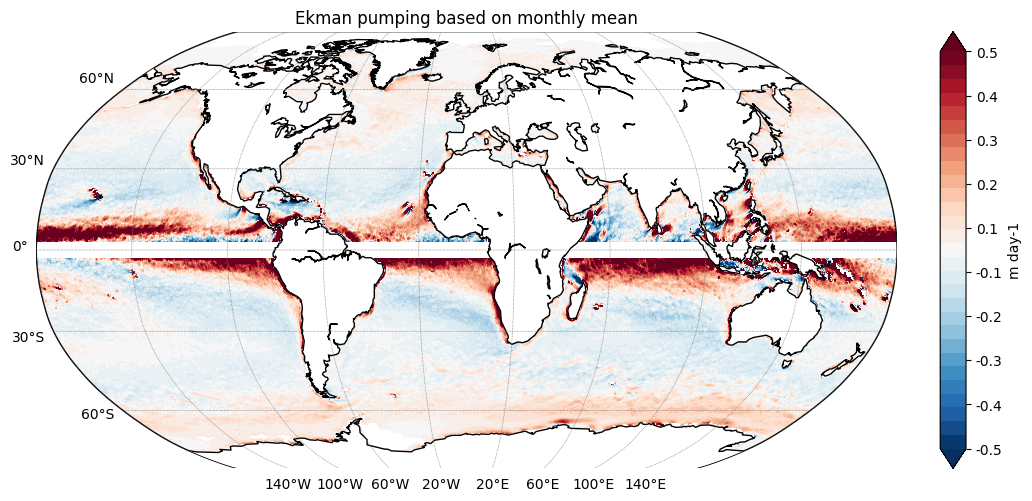

In [67]:
plot_variable(86400*w_E_monthly.mean(dim='time'), w_E_monthly.lon, w_E_monthly.lat, mask,
              title="Ekman pumping based on monthly mean",cb_title = "m day-1", vmin=-.5, vmax=.5)

### Coastal Upwelling

Run the next cell to get a plot showing coastal upwelling in the region near San Francisco. The wind vectors run parallel to the coast, pushing surface water away from the land. Positive Ekman pumping velocity (colourd) is enhanced in a near-coastal band. As a result, cold, nutrient-rich water rises from the depths to replace the surface layers, which is characteristic of upwelling zones.


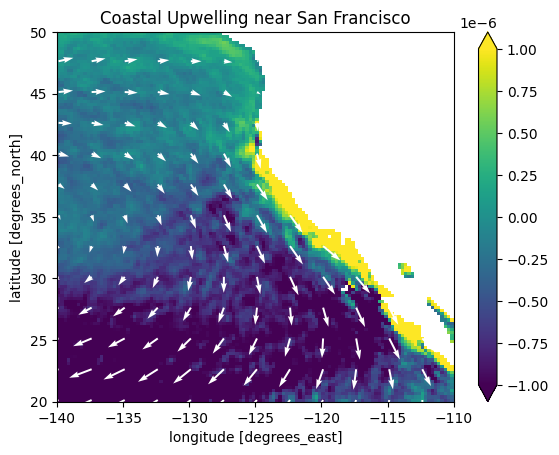

In [ ]:
# run the cell

w_E_masked=w_E.where(mask)

cu = w_E_masked.sel(lon=slice(-140, -110), lat=slice(20,50))

fig, ax = plt.subplots()
# Plot the coastal upwelling
cu.plot(ax=ax, vmin=-1e-6, vmax=1e-6, cmap='viridis')

# 
u = ds_wind_mean['eastward_wind'].sel(lon=slice(-140, -110), lat=slice(20,50))[::10, ::10]  
v = ds_wind_mean['northward_wind'].sel(lon=slice(-140, -110), lat=slice(20,50))[::10, ::10]  

# 
ax.quiver(u.lon, u.lat, u.values, v.values, scale=100, color='white')

ax.set_title('Coastal Upwelling near San Francisco')
plt.show()


**Upwelling region in the Humboldt Current System**

This region, along the coasts of Peru and northern Chile, experiences enhanced upwelling, which is influenced by ENSO phases, significantly affecting ocean productivity and climate variability.

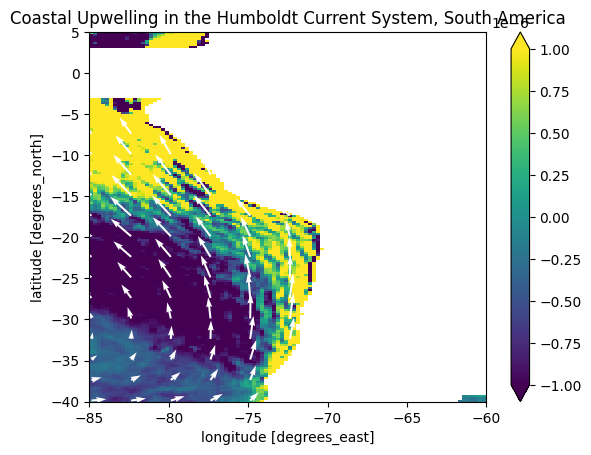

In [ ]:
#run the cellS
cu = w_E_masked.sel(lon=slice(-85, -60), lat=slice(-40,5))

fig, ax = plt.subplots()
# Plot the coastal upwelling
cu.plot(ax=ax, vmin=-1e-6, vmax=1e-6, cmap='viridis')

# 
u = ds_wind_mean['eastward_wind'].sel(lon=slice(-85, -60), lat=slice(-40,-5))[::10, ::10]  
v = ds_wind_mean['northward_wind'].sel(lon=slice(-85, -60), lat=slice(-40,-5))[::10, ::10]  

# 
ax.quiver(u.lon, u.lat, u.values, v.values, scale=100, color='white')

ax.set_title('Coastal Upwelling in the Humboldt Current System, South America')
plt.show()

In [ ]:
#run the cell

from IPython.display import Image

# How to display an image from a URL
Image(url='https://oceanexplorer.noaa.gov/facts/media/upwelling-800.jpg', width=500, height=300)

Figure modified by D. Reed from image by J. Wallace and S. Vogel, El Niño and Climate Prediction. Image courtesy of Sanctuary Quest 2002, NOAA/OER. and included in this notebook via https://oceanexplorer.noaa.gov/facts/upwelling.html